In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection 
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("diabetes.csv")
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.shape

(768, 9)

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
numerical=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction','Age']
scaler = MinMaxScaler()
data[numerical]=scaler.fit_transform(data[numerical])



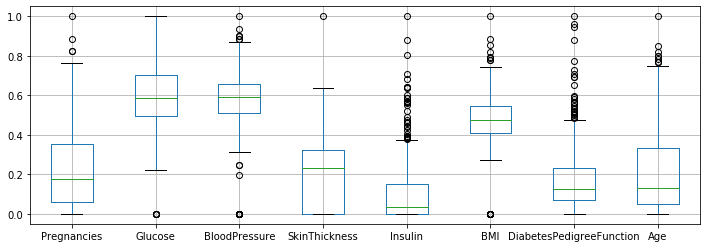

In [7]:
data.boxplot(column=numerical,figsize=(12,4))

In [8]:
def NotOutliers(col):
    Outlier = pd.DataFrame()
    q1,q3 = np.percentile(data[col],[25,75])
    iqr = q3-q1
    lower_bound = q1-(iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    Outlier=data[(data[col] < upper_bound) & (data[col] > lower_bound)]
    return Outlier

data = NotOutliers('Insulin')
data = NotOutliers('DiabetesPedigreeFunction')
data = NotOutliers('Age')
data = NotOutliers('BMI')
data = NotOutliers('BloodPressure')
data = NotOutliers('Pregnancies')
data = NotOutliers('SkinThickness')
data = NotOutliers('Glucose')
data.shape

(611, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,0.218928,0.587989,0.588031,0.210204,0.078074,0.476220,0.148870,0.184888,0.297872
std,0.190188,0.136414,0.089507,0.154022,0.093101,0.095792,0.104898,0.174890,0.457698
min,0.000000,0.221106,0.360656,0.000000,0.000000,0.271237,0.000000,0.000000,0.000000
25%,0.058824,0.492462,0.524590,0.000000,0.000000,0.406855,0.069599,0.050000,0.000000
50%,0.176471,0.562814,0.590164,0.232323,0.048463,0.476900,0.120837,0.116667,0.000000
75%,0.352941,0.668342,0.655738,0.323232,0.141844,0.535022,0.216268,0.300000,1.000000
max,0.764706,0.944724,0.836066,0.606061,0.375887,0.740686,0.462852,0.700000,1.000000


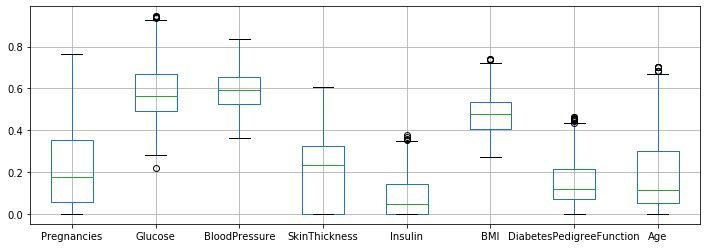

In [10]:
data.boxplot(column=numerical,figsize=(12,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4115fdb2d0>,
      dtype=object)

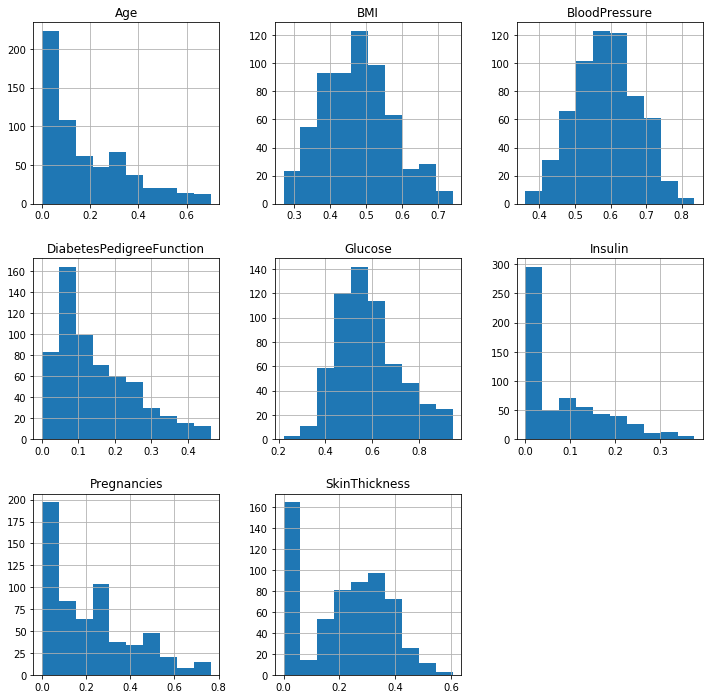

In [11]:
data.hist(column =numerical,figsize=(12,12))

In [12]:
data[numerical].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.131093,0.177593,-0.094312,-0.118734,0.022461,-0.005296,0.585431
Glucose,0.131093,1.000000,0.231952,0.014274,0.269807,0.196936,0.052263,0.248082
BloodPressure,0.177593,0.231952,1.000000,0.049767,-0.034023,0.287783,0.029676,0.336663
SkinThickness,-0.094312,0.014274,0.049767,1.000000,0.477970,0.388918,0.154033,-0.105869
Insulin,-0.118734,0.269807,-0.034023,0.477970,1.000000,0.186764,0.215353,-0.075049
BMI,0.022461,0.196936,0.287783,0.388918,0.186764,1.000000,0.146772,0.079518
DiabetesPedigreeFunction,-0.005296,0.052263,0.029676,0.154033,0.215353,0.146772,1.000000,0.051970
Age,0.585431,0.248082,0.336663,-0.105869,-0.075049,0.079518,0.051970,1.000000


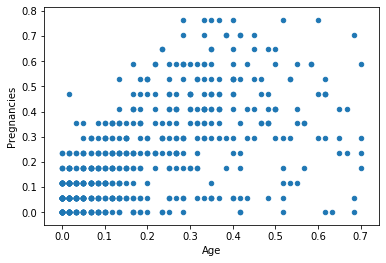

In [13]:
data.plot(kind='scatter',x="Age",y="Pregnancies")

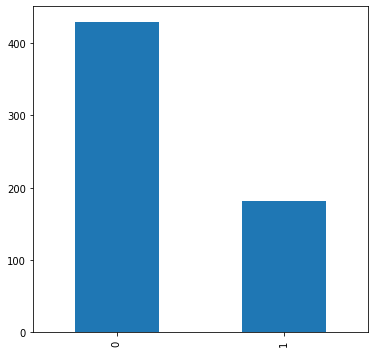

In [14]:
data['Outcome'].value_counts().plot(kind='bar', figsize=(6,6))

Text(0.5, 1.0, 'Graphique ACP')

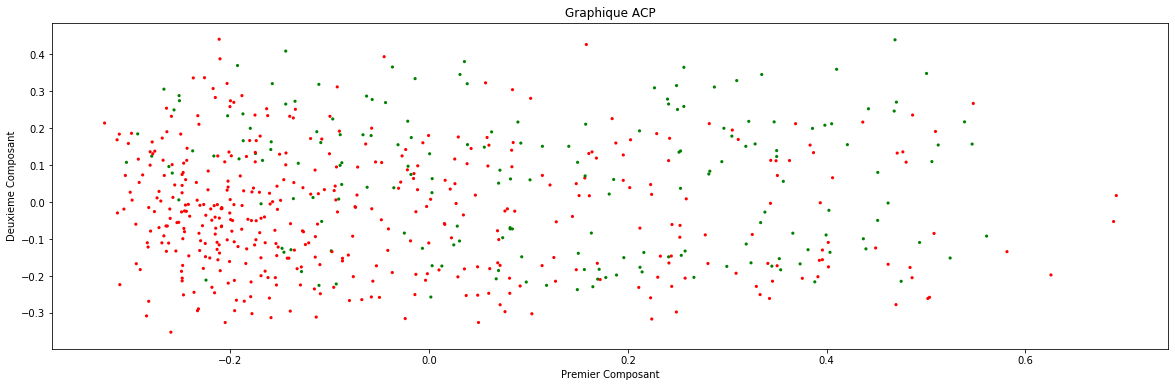

In [15]:
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(data[numerical])
labels_pca= data['Outcome']
cmp = np.array(['r','g'])
plt.figure(figsize=(20,6))
plt.scatter(dataPCA[:,0],dataPCA[:,1],c=cmp[labels_pca],s=10,edgecolors='none')
plt.xlabel("Premier Composant")
plt.ylabel("Deuxieme Composant")
plt.title("Graphique ACP")

In [17]:
X_train,X_test, y_train,y_test = model_selection.train_test_split(data[numerical],data['Outcome'],test_size=0.2,random_state=1)
print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 488 samples
Testing set has 123 samples


In [18]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('MLP',MLPClassifier()))

In [19]:
results = []
results_mean=[]
names = []
seed = 10
score =['accuracy','roc_auc','f1','precision','recall']
scores = []
for scoring in score:
    for name, model in models:
        kfold = model_selection.KFold(n_splits=7, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring,verbose=0)
        results.append(cv_results)
        names.append(name)
        scores.append(scoring)
        results_mean.append(cv_results.mean())
        
data_r = pd.DataFrame(columns=['Model','score','result'])
data_r['Model'] = names
data_r['score'] = scores
data_r['result'] = results_mean

data_rr = pd.DataFrame(columns=['Model','accuracy','roc_auc','f1','precision','recall'])

data_rr['Model'] = list(set(data_r['Model']))
data_rr['accuracy'] = list(data_r['result'][data_r['score']== 'accuracy'])
data_rr['roc_auc'] = list(data_r['result'][data_r['score']== 'roc_auc'])
data_rr['f1'] = list(data_r['result'][data_r['score']== 'f1'])
data_rr['precision'] = list(data_r['result'][data_r['score']== 'precision'])
data_rr['recall'] = list(data_r['result'][data_r['score']== 'recall'])
data_rr

,Model,accuracy,roc_auc,f1,precision,recall
0,KNeighborsClassifier,0.745844,0.815487,0.434635,0.700057,0.322679
1,SVM,0.762378,0.826428,0.554482,0.651698,0.488099
2,DecisionTreeClassifier,0.727536,0.742072,0.519480,0.572228,0.484415
3,LinearDiscriminantAnalysis,0.709198,0.667672,0.525414,0.542351,0.535060
4,GaussianNB,0.739811,0.807672,0.565418,0.582788,0.560113
5,LogisticRegression,0.698521,0.821050,0.055003,0.357143,0.029945
6,MLP,0.717184,0.793163,0.445446,0.613548,0.431310
7,RandomForestClassifier,0.748033,0.801652,0.453195,0.638557,0.363146


In [20]:
svc = model_selection.GridSearchCV(SVC(),{},cv=5)
svc.fit(X_train,y_train)
model_final = svc.best_estimator_

In [21]:
pred = model_final.predict(X_test)

In [22]:
accuracy_score(pred,y_test)

0.7479674796747967

In [23]:
model_final.score(X_train,y_train)

0.7131147540983607

In [24]:
model_final.score(X_test,y_test)

0.7479674796747967